In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/b8/8bcwv14d5095k5kr8yxwb6r80000gn/T/ipykernel_43678/3408537860.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("results/train_loss_GRU_BCE_.csv")
sep_angles = [0.5, 1.0, 2.0, 5.0, 10.0]
col_names = ["sep-{} - train/train_loss".format(x) for x in sep_angles]
test_col_names = ["sep-{} - val/val_loss".format(x) for x in sep_angles]
col_names.insert(0, "Step")
test_col_names.insert(0, "Step")

df = df[col_names]
test_df = pd.read_csv("results/test_loss_GRU_BCE_.csv")
test_df = test_df[test_col_names]
df

,Step,sep-0.5 - train/train_loss,sep-1.0 - train/train_loss,sep-2.0 - train/train_loss,sep-5.0 - train/train_loss,sep-10.0 - train/train_loss
0,0,0.690280,0.689952,0.693834,0.695056,0.699497
1,1,0.689198,0.706547,0.685843,0.693565,0.689671
2,2,0.688316,0.706797,0.676985,0.680870,0.670410
3,3,0.690876,0.691608,0.674207,0.679691,0.641962
4,4,0.696584,0.687941,0.649180,0.661200,0.641593
...,...,...,...,...,...,...
145,145,0.128069,0.059847,0.051068,0.049505,0.050879
146,146,0.125538,0.058979,0.049942,0.048397,0.050230
147,147,0.123448,0.058051,0.050013,0.047550,0.049580
148,148,0.120587,0.057112,0.049116,0.047096,0.048902


In [3]:
test_df = pd.read_csv("results/test_loss_GRU_BCE_.csv")
test_df

,Step,sep-0.5 - val/val_loss,sep-0.5 - val/val_loss__MIN,sep-0.5 - val/val_loss__MAX,sep-1.0 - val/val_loss,sep-1.0 - val/val_loss__MIN,sep-1.0 - val/val_loss__MAX,sep-2.0 - val/val_loss,sep-2.0 - val/val_loss__MIN,sep-2.0 - val/val_loss__MAX,sep-5.0 - val/val_loss,sep-5.0 - val/val_loss__MIN,sep-5.0 - val/val_loss__MAX,sep-10.0 - val/val_loss,sep-10.0 - val/val_loss__MIN,sep-10.0 - val/val_loss__MAX
0,9,0.693270,0.693270,0.693270,0.689943,0.689943,0.689943,0.645198,0.645198,0.645198,0.608379,0.608379,0.608379,0.563481,0.563481,0.563481
1,19,0.691697,0.691697,0.691697,0.673423,0.673423,0.673423,0.606096,0.606096,0.606096,0.507285,0.507285,0.507285,0.468931,0.468931,0.468931
2,29,0.692257,0.692257,0.692257,0.642117,0.642117,0.642117,0.497688,0.497688,0.497688,0.418460,0.418460,0.418460,0.389372,0.389372,0.389372
3,39,0.687609,0.687609,0.687609,0.598696,0.598696,0.598696,0.471549,0.471549,0.471549,0.352673,0.352673,0.352673,0.322052,0.322052,0.322052
4,49,0.682148,0.682148,0.682148,0.575083,0.575083,0.575083,0.387520,0.387520,0.387520,0.298279,0.298279,0.298279,0.267631,0.267631,0.267631
5,59,0.671854,0.671854,0.671854,0.533620,0.533620,0.533620,0.330630,0.330630,0.330630,0.250156,0.250156,0.250156,0.222847,0.222847,0.222847
6,69,0.662624,0.662624,0.662624,0.466965,0.466965,0.466965,0.288349,0.288349,0.288349,0.208867,0.208867,0.208867,0.185320,0.185320,0.185320
7,79,0.631716,0.631716,0.631716,0.404306,0.404306,0.404306,0.243926,0.243926,0.243926,0.175804,0.175804,0.175804,0.154062,0.154062,0.154062
8,89,0.608150,0.608150,0.608150,0.345488,0.345488,0.345488,0.207528,0.207528,0.207528,0.146858,0.146858,0.146858,0.128546,0.128546,0.128546
9,99,0.598031,0.598031,0.598031,0.309169,0.309169,0.309169,0.180047,0.180047,0.180047,0.123266,0.123266,0.123266,0.107760,0.107760,0.107760


In [4]:
i = 1
SIs = []
for i in range(1,6):
    res = (test_df[test_col_names[i]].to_numpy()[-1] - df[col_names[i]].to_numpy()[-1])/(df[col_names[i]].to_numpy()[0] - df[col_names[i]].to_numpy()[-1])
    SIs.append(res)
SIs

[1.0139693259195242,
 0.18248570522240112,
 0.05456334616742673,
 0.018673929971688777,
 0.002603496249383254]

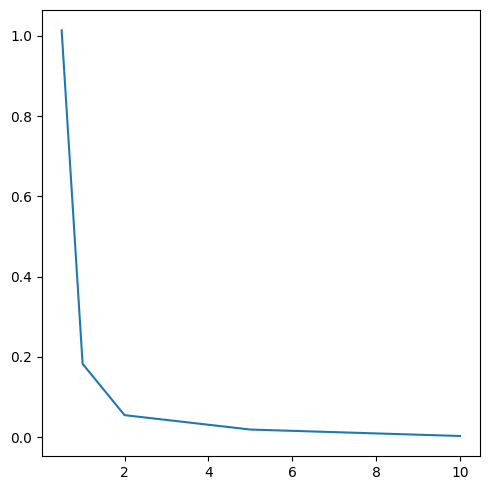

In [5]:
plt.figure(figsize= (5,5))

plt.plot(sep_angles, SIs)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'SI')

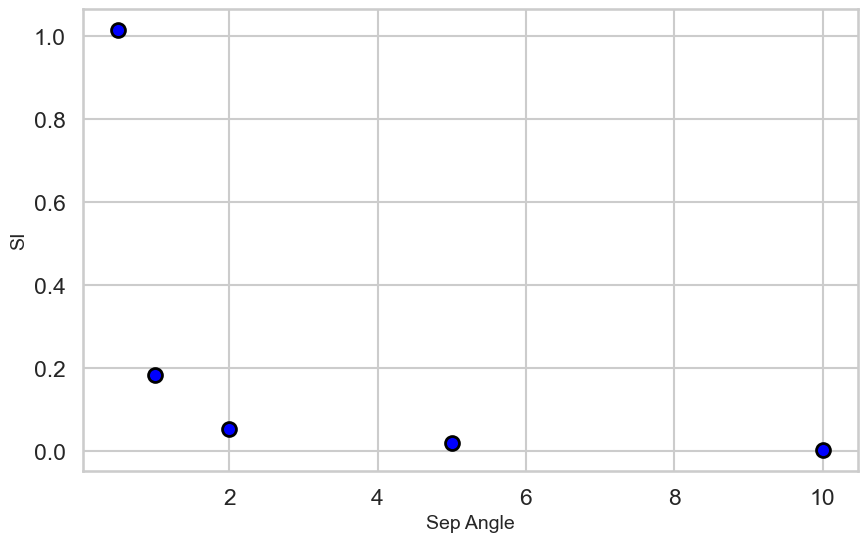

In [9]:
# Create the scatter plot using Seaborn
sns.set_theme(context='talk', style='whitegrid')


plt.figure(figsize=(10, 6))
plt.scatter(sep_angles, SIs, color='blue', s=100, edgecolor='black', linewidth=2)

# Adding titles and labels
plt.title('', fontsize=18)
plt.xlabel('Sep Angle', fontsize=14)
plt.ylabel('SI', fontsize=14)


In [42]:
test_df[test_col_names[i]].to_numpy()[-1]

0.6982695460319519